In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [17]:
import os
import gc
import sys
import json
import random
from pathlib import Path

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train.csv')


In [18]:
with open('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/label_descriptions.json', 'r') as file:
    label_desc = json.load(file)
sample_sub_df = pd.read_csv('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/sample_submission.csv')


In [20]:
categories_df = pd.DataFrame(label_desc['categories'])
attributes_df = pd.DataFrame(label_desc['attributes'])
categories_df

,id,name,supercategory,level
0,0,"shirt, blouse",upperbody,2
1,1,"top, t-shirt, sweatshirt",upperbody,2
2,2,sweater,upperbody,2
3,3,cardigan,upperbody,2
4,4,jacket,upperbody,2


In [4]:
df.head()

,ImageId,EncodedPixels,Height,Width,ClassId,AttributesIds
0,00000663ed1ff0c4e0132b9b9ac53f6e,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6,"115,136,143,154,230,295,316,317"
1,00000663ed1ff0c4e0132b9b9ac53f6e,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0,"115,136,142,146,225,295,316,317"
2,00000663ed1ff0c4e0132b9b9ac53f6e,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28,163
3,00000663ed1ff0c4e0132b9b9ac53f6e,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31,"160,204"
4,00000663ed1ff0c4e0132b9b9ac53f6e,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32,219


In [51]:
image_df = df.groupby('ImageId')['AttributesIds', 'ClassId'].agg(lambda x: list(x))
image_df.reset_index(inplace=True)
image_df['ImageId'] = image_df['ImageId'].astype('str')

/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_19344/700136001.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  image_df = df.groupby('ImageId')['AttributesIds', 'ClassId'].agg(lambda x: list(x))


In [52]:
names = ["shirt, blouse","top, t-shirt, sweatshirt","sweater","cardigan",
"jacket","vest","pants","shorts","skirt","coat","dress","jumpsuit","cape",
"glasses","hat","headband, head covering, hair accessory","tie","glove",
"watch","belt","leg warmer","tights, stockings","sock","shoe","bag, wallet",
"scarf","umbrella","hood","collar","lapel","epaulette","sleeve","pocket","neckline",
"buckle","zipper","applique","bead","bow","flower","fringe","ribbon","rivet","ruffle",
"sequin","tassel"]

In [53]:
set_cls= []
for i in range(len(image_df)):
    classes = list(set(image_df['ClassId'].iloc[i]))
    set_cls.append(classes)
    
image_df['SetClassId'] = set_cls
image_df.drop(['AttributesIds','ClassId'],axis=1,inplace=True)

In [54]:
image_df.head()

,ImageId,SetClassId
0,00000663ed1ff0c4e0132b9b9ac53f6e,"[0, 32, 4, 6, 28, 29, 31]"
1,0000fe7c9191fba733c8a69cfaf962b7,"[33, 1]"
2,0002ec21ddb8477e98b2cbb87ea2e269,"[33, 10, 23]"
3,0002f5a0ebc162ecfb73e2c91e3b8f62,"[33, 10, 15]"
4,0004467156e47b0eb6de4aa6479cbd15,"[33, 10, 15, 31]"


In [55]:
indices = []

# Loop through the rows of the DataFrame
for i in range(len(image_df)):
    if len(image_df.SetClassId.iloc[i]) == 1:
        indices.append(i)

print(len(indices))

317


In [57]:
# Define the numbers to search for
#search_numbers = [9, 10, 11, 12]
search_numbers = [10]

# Create a boolean mask indicating which rows contain the specified numbers
mask = image_df['SetClassId'].apply(lambda x: any([num in x for num in search_numbers]))

# Filter the DataFrame based on the mask
filtered_df = image_df[mask]
other_df = image_df[~mask]


**************************************************


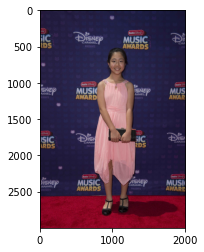

[0] neckline 
[1] bead 
[2] dress 
[3] shoe 
[4] bag, wallet 
**************************************************
**************************************************


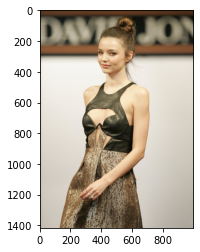

[0] neckline 
[1] dress 
**************************************************
**************************************************


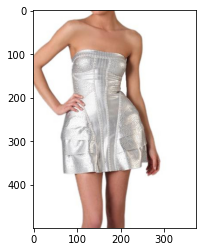

[0] neckline 
[1] dress 
**************************************************
**************************************************


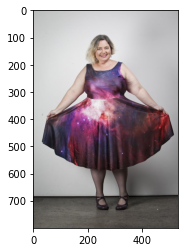

[0] neckline 
[1] dress 
[2] tights, stockings 
[3] shoe 
**************************************************
**************************************************


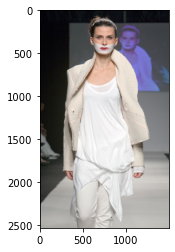

[0] neckline 
[1] jacket 
[2] pants 
[3] dress 
[4] lapel 
[5] sleeve 
**************************************************
**************************************************


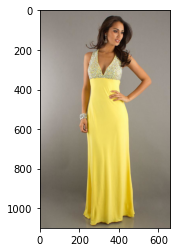

[0] neckline 
[1] dress 
[2] sequin 
**************************************************
**************************************************


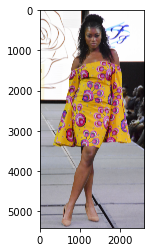

[0] neckline 
[1] dress 
[2] shoe 
[3] sleeve 
**************************************************
**************************************************


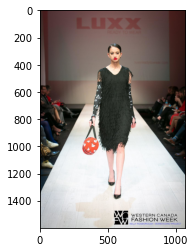

[0] neckline 
[1] dress 
[2] glove 
[3] shoe 
[4] bag, wallet 
**************************************************
**************************************************


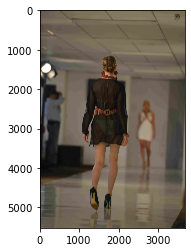

[0] neckline 
[1] buckle 
[2] dress 
[3] belt 
[4] shoe 
[5] sleeve 
**************************************************
**************************************************


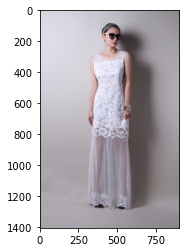

[0] neckline 
[1] dress 
[2] glasses 
[3] headband, head covering, hair accessory 
[4] shoe 
**************************************************
**************************************************


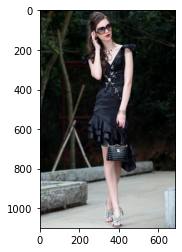

[0] neckline 
[1] applique 
[2] dress 
[3] ruffle 
[4] glasses 
[5] shoe 
[6] bag, wallet 
[7] sleeve 
**************************************************
**************************************************


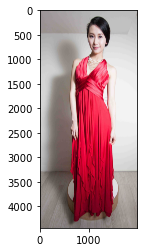

[0] neckline 
[1] dress 
**************************************************
**************************************************


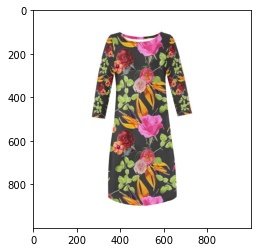

[0] neckline 
[1] dress 
[2] sleeve 
**************************************************
**************************************************


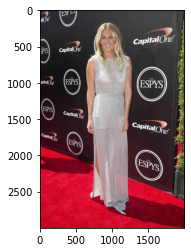

[0] neckline 
[1] dress 
[2] shoe 
**************************************************
**************************************************


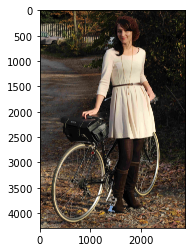

[0] neckline 
[1] buckle 
[2] dress 
[3] hat 
[4] belt 
[5] tights, stockings 
[6] sock 
[7] shoe 
[8] bag, wallet 
[9] sleeve 
**************************************************
**************************************************


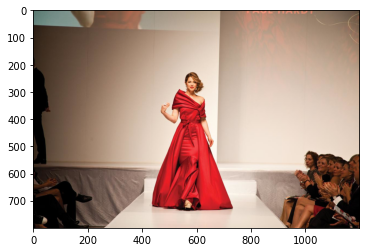

[0] neckline 
[1] dress 
[2] belt 
[3] shoe 
[4] sleeve 
**************************************************
**************************************************


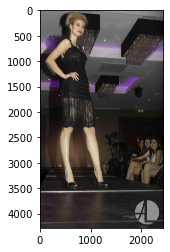

[0] neckline 
[1] dress 
[2] shoe 
**************************************************
**************************************************


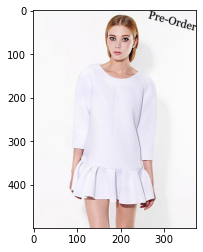

[0] neckline 
[1] dress 
[2] ruffle 
[3] sleeve 
**************************************************
**************************************************


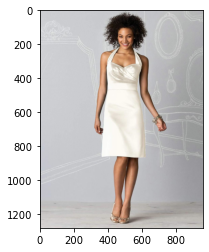

[0] neckline 
[1] dress 
[2] shoe 
**************************************************
**************************************************


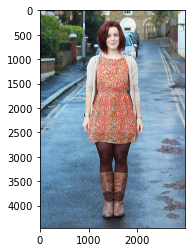

[0] neckline 
[1] cardigan 
[2] dress 
[3] watch 
[4] tights, stockings 
[5] shoe 
[6] sleeve 
**************************************************
**************************************************


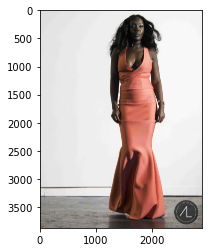

[0] neckline 
[1] dress 
[2] watch 
**************************************************
**************************************************


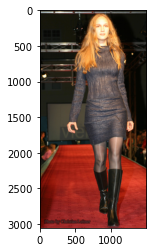

[0] neckline 
[1] dress 
[2] tights, stockings 
[3] shoe 
[4] sleeve 
**************************************************
**************************************************


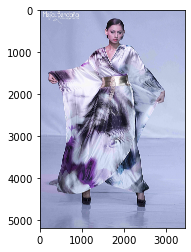

[0] neckline 
[1] dress 
[2] belt 
[3] shoe 
**************************************************
**************************************************


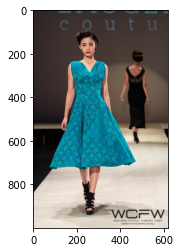

[0] neckline 
[1] dress 
[2] shoe 
**************************************************
**************************************************


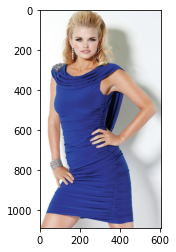

[0] neckline 
[1] dress 
[2] bead 
**************************************************


In [58]:
for i in range(25):
    x = np.random.randint(0,len(filtered_df),size=(1,))[0]
    ID = filtered_df['ImageId'].iloc[x]
    classes = filtered_df['SetClassId'].iloc[x]
    print('*'*50)
    plt.imshow(mpimg.imread(f'/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train/{ID}.jpg'))
    plt.show()
    for j in range(len(classes)):
        print('[{}] {} '.format(j,names[classes[j]]))
    print('*'*50)
    

**************************************************


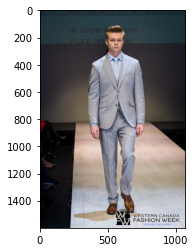

[0] shirt, blouse 
[1] neckline 
[2] pocket 
[3] jacket 
[4] vest 
[5] pants 
[6] tie 
[7] shoe 
[8] collar 
[9] lapel 
[10] sleeve 
**************************************************
**************************************************


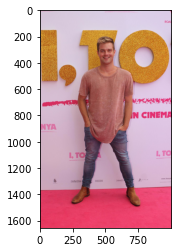

[0] pocket 
[1] neckline 
[2] top, t-shirt, sweatshirt 
[3] pants 
[4] shoe 
[5] sleeve 
**************************************************
**************************************************


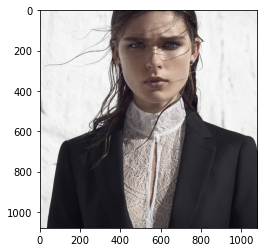

[0] neckline 
[1] top, t-shirt, sweatshirt 
[2] jacket 
[3] lapel 
[4] sleeve 
**************************************************
**************************************************


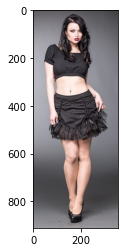

[0] top, t-shirt, sweatshirt 
[1] neckline 
[2] skirt 
[3] ribbon 
[4] shoe 
[5] sleeve 
**************************************************
**************************************************


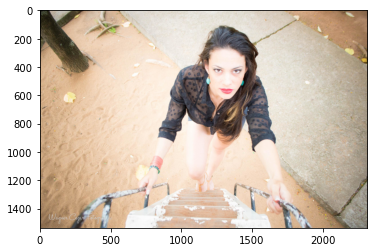

[0] shirt, blouse 
[1] sleeve 
[2] shoe 
**************************************************
**************************************************


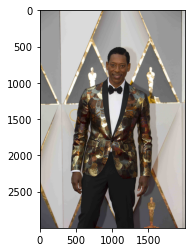

[0] shirt, blouse 
[1] pocket 
[2] jacket 
[3] pants 
[4] tie 
[5] collar 
[6] lapel 
[7] sleeve 
**************************************************
**************************************************


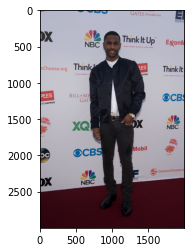

[0] pocket 
[1] shirt, blouse 
[2] buckle 
[3] jacket 
[4] pants 
[5] watch 
[6] belt 
[7] shoe 
[8] collar 
[9] sleeve 
**************************************************
**************************************************


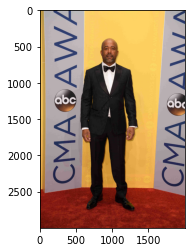

[0] pocket 
[1] shirt, blouse 
[2] jacket 
[3] pants 
[4] tie 
[5] watch 
[6] shoe 
[7] collar 
[8] lapel 
[9] sleeve 
**************************************************
**************************************************


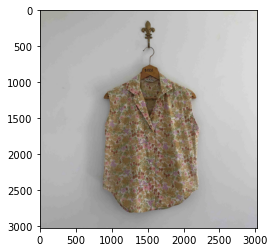

[0] shirt, blouse 
[1] lapel 
**************************************************
**************************************************


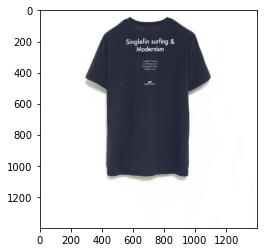

[0] top, t-shirt, sweatshirt 
[1] neckline 
[2] sleeve 
**************************************************
**************************************************


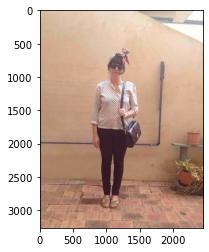

[0] shirt, blouse 
[1] pants 
[2] glasses 
[3] headband, head covering, hair accessory 
[4] watch 
[5] shoe 
[6] bag, wallet 
[7] collar 
[8] sleeve 
**************************************************
**************************************************


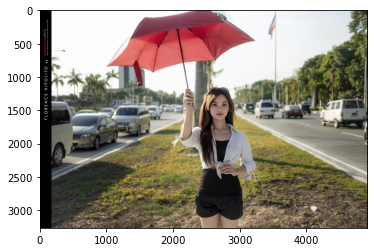

[0] pocket 
[1] top, t-shirt, sweatshirt 
[2] neckline 
[3] shirt, blouse 
[4] shorts 
[5] glasses 
[6] umbrella 
[7] collar 
[8] sleeve 
**************************************************
**************************************************


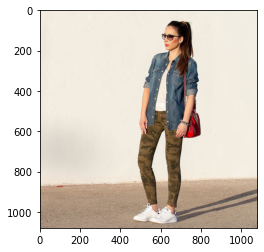

[0] pocket 
[1] top, t-shirt, sweatshirt 
[2] neckline 
[3] zipper 
[4] jacket 
[5] pants 
[6] glasses 
[7] shoe 
[8] bag, wallet 
[9] collar 
[10] sleeve 
**************************************************
**************************************************


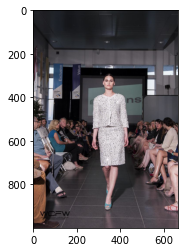

[0] neckline 
[1] zipper 
[2] jacket 
[3] skirt 
[4] shoe 
[5] sleeve 
**************************************************
**************************************************


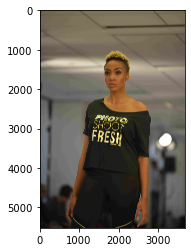

[0] top, t-shirt, sweatshirt 
[1] sleeve 
[2] pants 
[3] neckline 
**************************************************
**************************************************


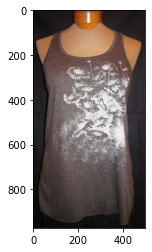

[0] neckline 
[1] top, t-shirt, sweatshirt 
**************************************************
**************************************************


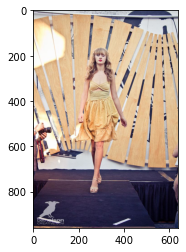

[0] skirt 
[1] top, t-shirt, sweatshirt 
[2] shoe 
[3] neckline 
**************************************************
**************************************************


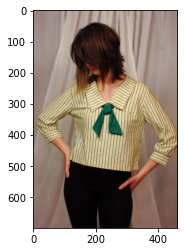

[0] top, t-shirt, sweatshirt 
[1] pants 
[2] tie 
[3] collar 
[4] sleeve 
**************************************************
**************************************************


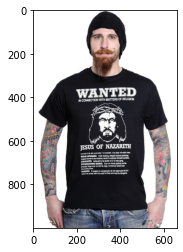

[0] top, t-shirt, sweatshirt 
[1] sleeve 
[2] hat 
[3] neckline 
**************************************************
**************************************************


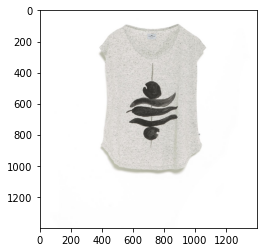

[0] top, t-shirt, sweatshirt 
[1] applique 
[2] neckline 
[3] sleeve 
**************************************************
**************************************************


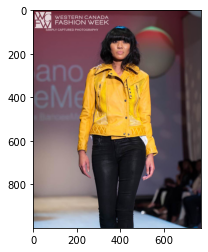

[0] pocket 
[1] zipper 
[2] jacket 
[3] pants 
[4] rivet 
[5] lapel 
[6] epaulette 
[7] sleeve 
**************************************************
**************************************************


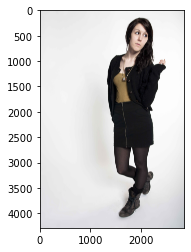

[0] pocket 
[1] neckline 
[2] top, t-shirt, sweatshirt 
[3] zipper 
[4] cardigan 
[5] skirt 
[6] tights, stockings 
[7] sock 
[8] shoe 
[9] sleeve 
**************************************************
**************************************************


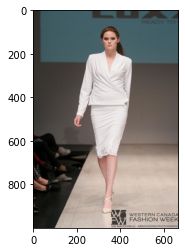

[0] top, t-shirt, sweatshirt 
[1] neckline 
[2] skirt 
[3] shoe 
[4] sleeve 
**************************************************
**************************************************


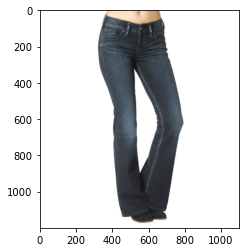

[0] pocket 
[1] rivet 
[2] pants 
[3] shoe 
**************************************************
**************************************************


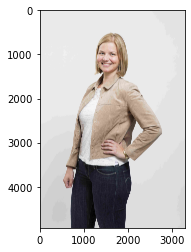

[0] pocket 
[1] neckline 
[2] top, t-shirt, sweatshirt 
[3] jacket 
[4] pants 
[5] rivet 
[6] watch 
[7] collar 
[8] sleeve 
**************************************************


In [59]:
for i in range(25):
    x = np.random.randint(0,len(other_df),size=(1,))[0]
    ID = other_df['ImageId'].iloc[x]
    classes = other_df['SetClassId'].iloc[x]
    print('*'*50)
    plt.imshow(mpimg.imread(f'/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train/{ID}.jpg'))
    plt.show()
    for j in range(len(classes)):
        print('[{}] {} '.format(j,names[classes[j]]))
    print('*'*50)

In [60]:
filtered_df["Class"]=1
other_df["Class"]=0

/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_19344/4009865848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Class"]=1
/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_19344/4009865848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_df["Class"]=0


In [61]:
Sample_One=filtered_df.sample(n=5000, random_state=1)
Sample_Zero=other_df.sample(n=5000, random_state=1)

In [62]:
# Join the two DataFrames based on the 'ImageId' column
merged_df = pd.concat([Sample_One, Sample_Zero], sort=False)

# Print the merged DataFrame
merged_df

,ImageId,SetClassId,Class
23901,85e8704c1a884af54504c7b5ece67dd7,"[33, 10, 23]",1
25944,91a36a8a6a9d6b5d6caebb12ebcb2c1d,"[33, 10, 13, 23, 31]",1
14207,4f423230aeee6d70264a5f0eecd2b0c9,"[33, 10, 19]",1
24037,86ad840a18878cc3c98900e7069185a1,"[33, 10, 21, 23, 31]",1
30219,a9311f428f647d69230d41577f3a762b,"[33, 10]",1
...,...,...,...
34209,bfe429acd9c4fcb81d92a0e12567103d,"[1, 31, 6, 33]",0
7039,272c398f340d217c886e8448ff43b1e1,"[33, 1, 11, 15, 31]",0
10783,3c3d5640ec24a117e433781a2461b804,"[0, 23, 29, 7]",0
6891,26640ed90fbd5888f2dde83052d4cd23,"[32, 1, 33, 4, 6, 13, 14, 23, 29, 31]",0
